In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


## 승하차인구수와 공실률의 상관관계 확인

In [2]:
corr_df = pd.read_excel('../data_pre/상관관계_테이블.xlsx') # 데이터 불러오기 

In [3]:
corr_df.head()

,지하철역,환승역수,상가수,사용 상가 수,공실률,공실0/1,승하차인구수
0,동대문,2,14,26,0.0,1,2167063
1,시청,2,7,7,0.0,1,2721058
2,구로디지털단지,1,4,4,0.0,1,3486238
3,낙성대,1,4,4,0.0,1,3255663
4,문래,1,4,4,0.0,1,1143717


In [4]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지하철역     35 non-null     object 
 1   환승역수     35 non-null     int64  
 2   상가수      35 non-null     int64  
 3   사용 상가 수  35 non-null     int64  
 4   공실률      35 non-null     float64
 5   공실0/1    35 non-null     int64  
 6   승하차인구수   35 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.0+ KB


In [5]:
# 피어슨 상관계수로 상관관계 분석 
corr_matrix  = corr_df.drop(columns='지하철역').corr() 
display(corr_matrix)

,환승역수,상가수,사용 상가 수,공실률,공실0/1,승하차인구수
환승역수,1.000000,0.098432,0.687678,-0.220368,0.221163,0.313973
상가수,0.098432,1.000000,0.461649,0.377981,-0.385291,0.234408
사용 상가 수,0.687678,0.461649,1.000000,-0.368935,0.361618,0.374655
공실률,-0.220368,0.377981,-0.368935,1.000000,-0.996404,-0.249009
공실0/1,0.221163,-0.385291,0.361618,-0.996404,1.000000,0.254991
승하차인구수,0.313973,0.234408,0.374655,-0.249009,0.254991,1.000000


c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


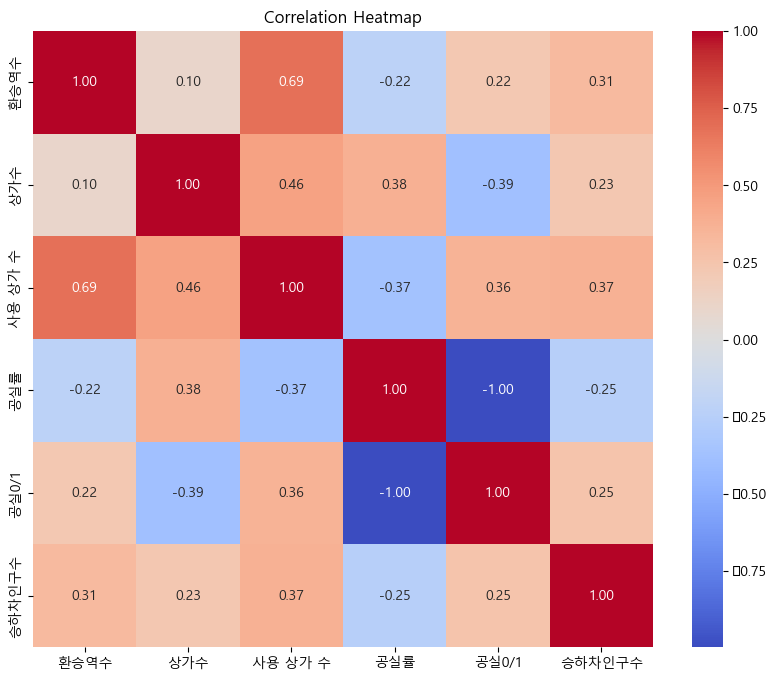

In [6]:
plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # annot=True: 숫자 표시, cmap: 색상 맵 지정, fmt: 숫자 형식 설정

plt.title('Correlation Heatmap')  # 그래프 제목 추가
plt.show()

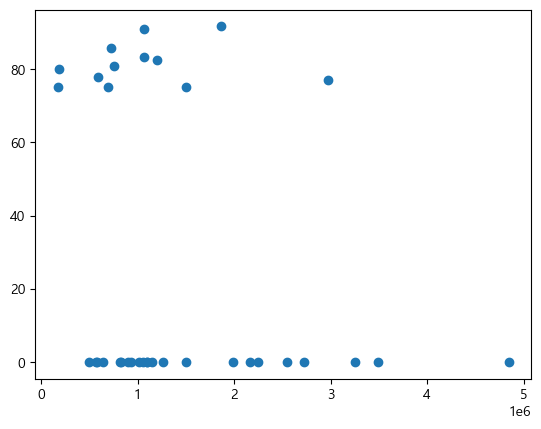

In [7]:
plt.scatter(x=corr_df['승하차인구수'],y=corr_df['공실률']) # 상관관계 시각화 

### 결론
- 피어슨 상관계수는 -1에서 1 사이의 값을 가지며 1에 가까울수록 양의 상관관계가 강하고, -1에 가까울수록 음의 상관관계가 강하다. 일반적으로 0.1에서 0.3 사이는 약한 상관관계를 가지고 있다고 하는데, 승하차인구수와 공실률은 -0.25로 약한 음의 상관관계를 가지고 있다.

## 월 임대료와 공실률의 선형관계 확인

In [8]:
linear_df = pd.read_excel('../data_pre/선형회귀_테이블.xlsx') # 데이터 불러오기 

In [9]:
linear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   지하철역            35 non-null     object 
 1   1제곱미터당 평균 월임대료  35 non-null     float64
 2   공실률             35 non-null     float64
 3   공실0/1           35 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [15]:
# 피어슨 상관계수로 상관관계 분석 
corr_matrix  = linear_df.drop(columns='지하철역').corr()
display(corr_matrix)

,1제곱미터당 평균 월임대료,공실률,공실0/1
1제곱미터당 평균 월임대료,1.000000,0.151423,-0.133985
공실률,0.151423,1.000000,-0.996404
공실0/1,-0.133985,-0.996404,1.000000


c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


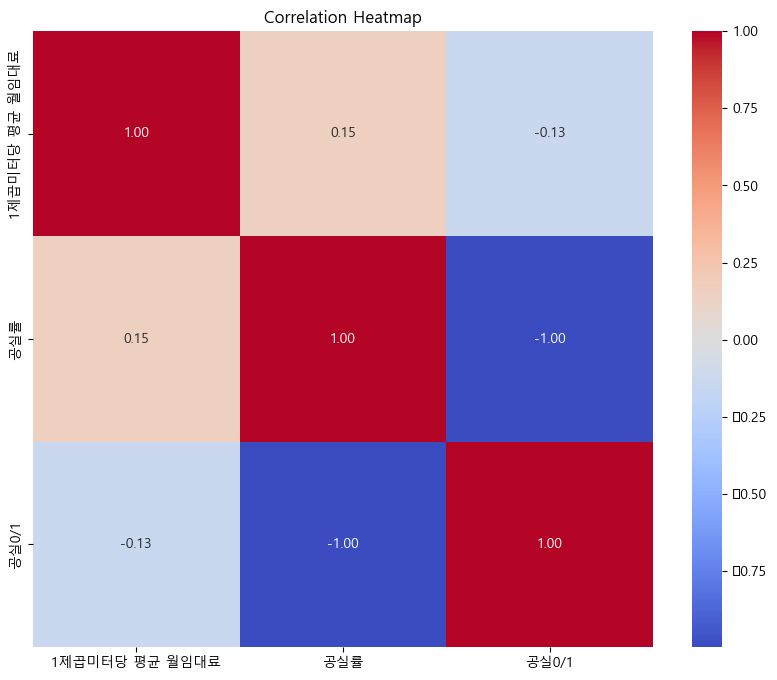

In [16]:
plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # annot=True: 숫자 표시, cmap: 색상 맵 지정, fmt: 숫자 형식 설정

plt.title('Correlation Heatmap')  # 그래프 제목 추가
plt.show()
### 월 임대료와 공실률의 상관관계가 0.15로 매우 낮다 


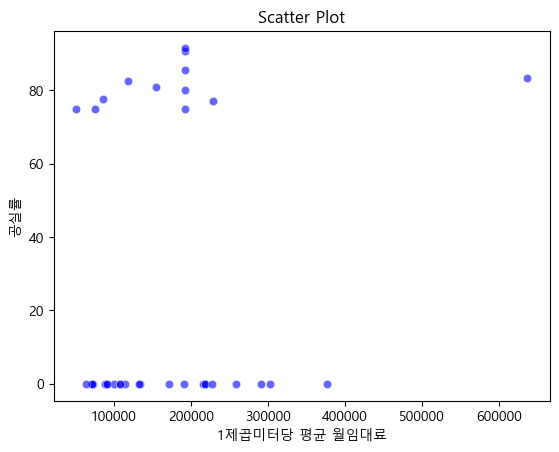

In [17]:
sns.scatterplot(data=linear_df, x='1제곱미터당 평균 월임대료', y='공실률', markers='o', color='blue', alpha=0.6) # 상관관계 시각화 
plt.title('Scatter Plot') 
plt.show()

In [18]:
X = linear_df['1제곱미터당 평균 월임대료'].to_numpy().reshape(-1,1) #단순 선형회귀라 2차원 배열로 재구성
y = linear_df['공실률']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape # shape 확인 

((28, 1), (28,), (7, 1), (7,))

In [21]:
# 선형회귀 모델링 
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred_test = lr.predict(X_test)

In [22]:
pd.DataFrame({'feature': ['1제곱미터당 평균 월임대료'], 'coefficients': lr.coef_}) #회귀계수 확인 

,feature,coefficients
0,1제곱미터당 평균 월임대료,0.000101


In [23]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    공실률   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.236
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.147
Time:                        14:26:52   Log-Likelihood:                -141.38
No. Observations:                  28   AIC:                             286.8
Df Residuals:                      26   BIC:                             289.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4327     13.994      0.817      0.421     -17.332      40.198
x1             0.0001   6.77e-05      1.495      0.147   -3.79e-05       0.000
==============================================================================
Omnibus:                       11.961   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.202
Skew:                           0.648   Prob(JB):                        0.122
Kurtosis:                       1.613   Cond. No.                     3.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
print(model.score(X_train, y_train)) 

0.0791742488967836


### 결론
- 해당 모델은 R-squared가 0.079로 설명력이 거의 없고 컬럼의  p-value가 0.15로 유의한 컬럼이 아니다. 
- 선형관계를 가지고 있지 않다 

## 로지스틱 회귀분석 

In [25]:
logistic_df = pd.read_excel('../data_pre/로지스틱_테이블.xlsx') # 데이터 불러오기 

In [26]:
logistic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   지하철역            35 non-null     object 
 1   1제곱미터당 평균 월임대료  35 non-null     float64
 2   환승역수            35 non-null     int64  
 3   공실0/1           35 non-null     int64  
 4   승하차인구수          35 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB


In [28]:
Y = logistic_df['공실0/1'] # y 컬럼 
X = logistic_df[['승하차인구수','환승역수','1제곱미터당 평균 월임대료']] # x 컬럼 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=10) 


In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape # shape 확인 

((28, 3), (28,), (7, 3), (7,))

In [31]:
# 로지스틱 회귀 분석 모델링 
lo =LogisticRegression()
lo.fit(X_train, y_train)

LogisticRegression()

In [32]:
pred = lo.predict(X_test) # 예측값 pred에 저장 


In [33]:
col = X.columns

In [34]:
pd.DataFrame({'feature': col, 'coefficients': lo.coef_[0]}) # 회귀계수 확인 

,feature,coefficients
0,승하차인구수,6.426286e-07
1,환승역수,1.747649e-11
2,1제곱미터당 평균 월임대료,-2.681062e-06


In [35]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  공실0/1   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.6805
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.573
Time:                        14:26:52   Log-Likelihood:                -18.521
No. Observations:                  28   AIC:                             45.04
Df Residuals:                      24   BIC:                             50.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4210      0.578      0.728      0.473      -0.772       1.614
승하차인구수          4.675e-08   1.35e-07      0.347      0.732   -2.32e-07    3.25e-07
환승역수               0.2790      0.562      0.496      0.624      -0.881       1.439
1제곱미터당 평균 월임대료 -9.857e-07   8.52e-07     -1.156      0.259   -2.74e-06    7.73e-07
==============================================================================
Omnibus:                       24.891   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.972
Skew:                          -0.429   Prob(JB):                        0.137
Kurtosis:                       1.366   Cond. No.                     1.16e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 결론
- 데이터의 개수가 너무 적어 유의미하게 예측하는데에 한계가 있다.
- 해당 모델은 r-squared가 0.078밖에 되지 않아 설명력이 매우 낫고 각 칼럼의 p-value도 0.05보다 작지 않기에 유의한 컬럼들이 아니다. 